<img src="img/logo.png">

# Chargement des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

print("Version numpy : " + np.__version__)
print("Version pandas : " + pd.__version__)

bold = "\033[1m"
red = "\033[31m"
end = "\033[0;0m"

chemin_erp_web = '/Users/zqldata/Documents/P5/Input/erp_web.csv'

Version numpy : 1.23.5
Version pandas : 1.4.4


# Chargement du fichier .csv

In [2]:
erp_web = pd.read_csv(chemin_erp_web)

# 1. Chiffre d'affaires par produit

In [3]:
pd.options.display.max_rows = None

In [35]:
# feature engineering
erp_web['CA par produit'] = erp_web['price'] * erp_web['total_sales']
erp_web_ca = erp_web[["product_id", "sku", "post_name", "price", "total_sales", "stock_quantity", "CA par produit"]]
print(bold + red + f"\nLe chiffre d'affaires par produit est de :" + end)
erp_web_ca.head(10) #pour voir la liste complète des produits supprimer .head(10)


Le chiffre d'affaires par produit est de :


,product_id,sku,post_name,price,total_sales,stock_quantity,CA par produit
0,3847,15298,pierre-jean-villa-saint-joseph-preface-2018,24.2,6.0,0,145.2
1,3849,15296,pierre-jean-villa-saint-joseph-tilde-2017,34.3,0.0,0,0.0
2,3850,15300,pierre-jean-villa-croze-hermitage-accroche-coe...,20.8,0.0,0,0.0
3,4032,19814,pierre-jean-villa-igp-gamine-2018,14.1,3.0,0,42.3
4,4039,19815,pierre-jean-villa-cote-rotie-carmina-2017,46.0,0.0,0,0.0
5,4040,15303,pierre-jean-villa-saint-joseph-saut-ange-2018,34.3,0.0,0,0.0
6,4041,14975,pierre-gaillard-condrieu-2018,32.7,0.0,15,0.0
7,4042,16042,pierre-gaillard-cornas-2017,31.2,7.0,34,218.4
8,4043,14980,pierre-gaillard-cote-rotie-esprit-blond-2017,60.0,3.0,12,180.0
9,4045,16041,pierre-gaillard-cote-rotie-2018,42.6,14.0,66,596.4


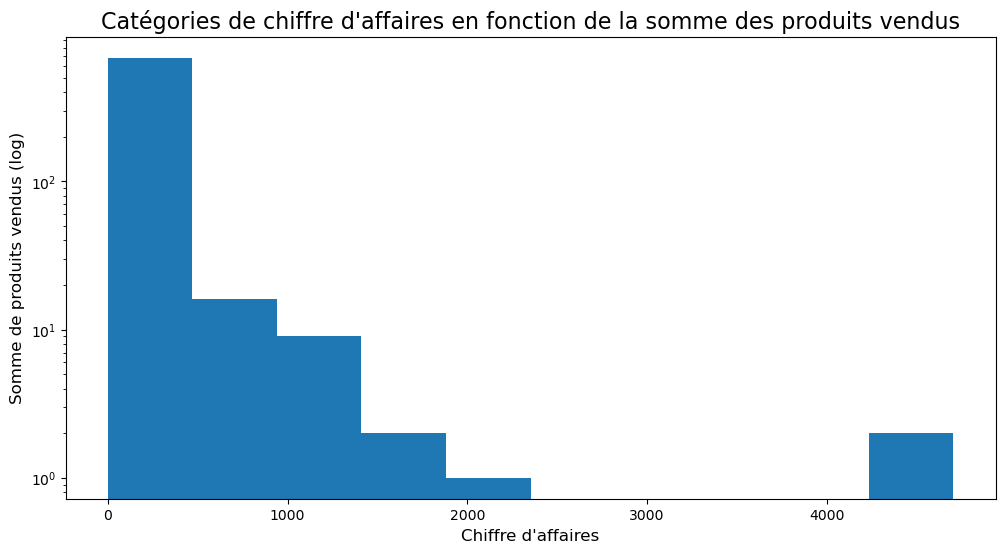

In [33]:
# visualisation
erp_web_ca['CA par produit'].plot.hist(figsize=(12, 6))
plt.title("Catégories de chiffre d'affaires en fonction de la somme des produits vendus", fontsize=16)
plt.xlabel("Chiffre d'affaires", fontsize=12)
plt.ylabel("Somme de produits vendus (log)", fontsize=12)
plt.yscale('log') #mise en log pour améliorer la lisibilité du graphique
plt.show()

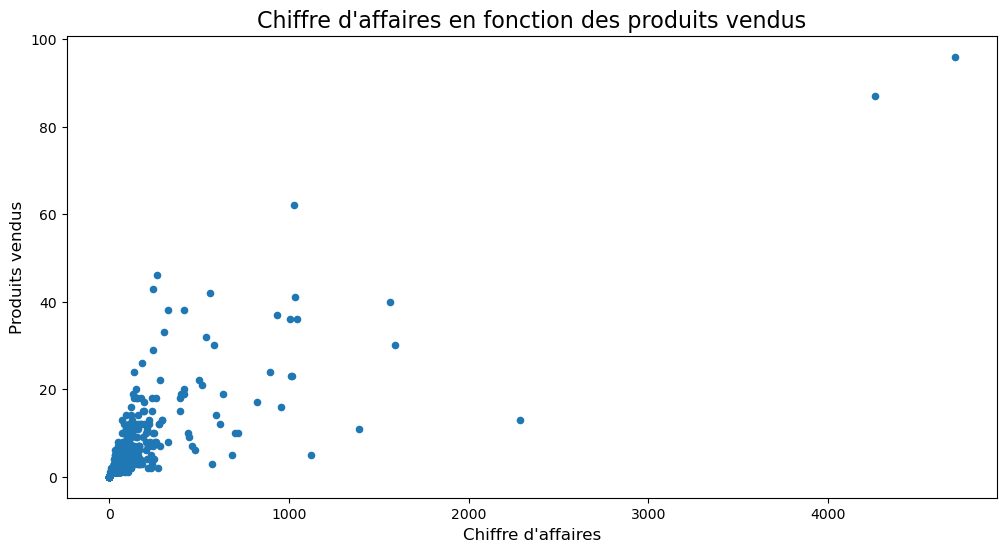

In [37]:
# visualisation
erp_web_ca.plot.scatter(x='CA par produit', y='total_sales', figsize=(12, 6))
plt.title("Chiffre d'affaires en fonction des produits vendus", fontsize=16)
plt.xlabel("Chiffre d'affaires", fontsize=12)
plt.ylabel("Produits vendus", fontsize=12)
plt.show()

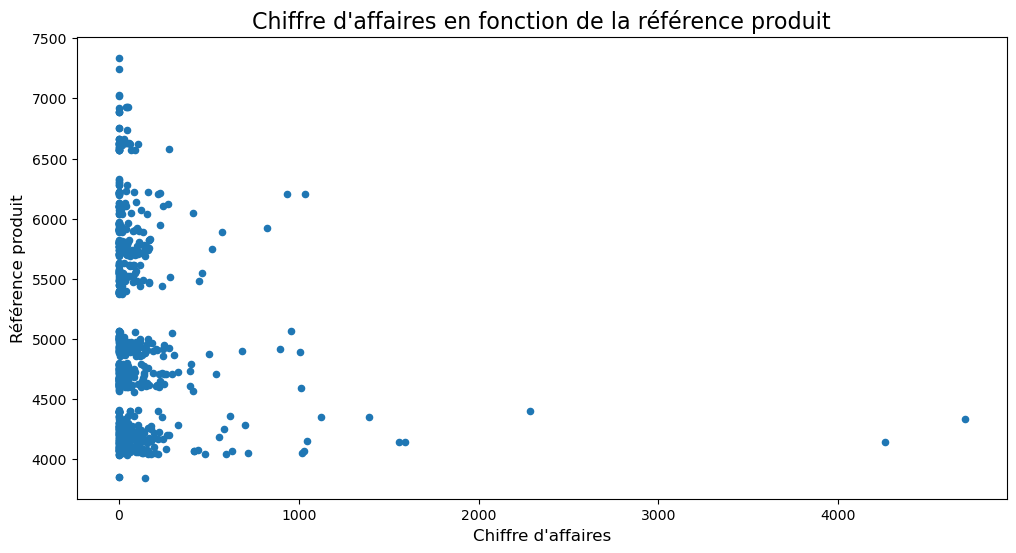

In [39]:
# visualisation
erp_web_ca.plot.scatter(x='CA par produit', y='product_id', figsize=(12, 6))
plt.title("Chiffre d'affaires en fonction de la référence produit", fontsize=16)
plt.xlabel("Chiffre d'affaires", fontsize=12)
plt.ylabel("Référence produit", fontsize=12);

In [8]:
# aperçu des statistiques descriptives
print(bold + red + f"\nCaractéristiques du chiffre d'affaires :" + end)
erp_web_ca['CA par produit'].describe()


Caractéristiques du chiffre d'affaires :


count     714.000000
mean       98.835574
std       307.685071
min         0.000000
25%         0.000000
50%        15.250000
75%        91.150000
max      4704.000000
Name: CA par produit, dtype: float64

## **Six produits se détachent en terme de chiffre d'affaires**

In [43]:
print(bold + red + f"\nLes six produits avec le plus gros chiffre d'affaires sont :" + end)
top_6 = erp_web_ca.sort_values(by='CA par produit', ascending=False).head(6)
top_6


Les six produits avec le plus gros chiffre d'affaires sont :


,product_id,sku,post_name,price,total_sales,stock_quantity,CA par produit
194,4334,7818,champagne-gosset-grand-blanc-de-blanc,49.0,96.0,0,4704.0
71,4144,1662,champagne-gosset-grand-rose,49.0,87.0,11,4263.0
218,4402,3510,cognac-frapin-vip-xo,176.0,13.0,8,2288.0
70,4142,11641,champagne-gosset-grand-millesime-2006,53.0,30.0,8,1590.0
69,4141,304,gosset-champagne-grande-reserve,39.0,40.0,1,1560.0
201,4355,12589,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,126.5,11.0,2,1391.5


### *Part du chiffre d'affaires*

In [44]:
rate_ca = top_6['CA par produit'].sum() / erp_web_ca['CA par produit'].sum() * 100
rate_sales = top_6['total_sales'].sum() / erp_web_ca['total_sales'].sum() * 100
ca = top_6['CA par produit'].sum()
print(bold + red +
      f"\nCes six produits représentent à eux seuls {round(float(rate_ca), 2)} % ({ca} €) du chiffre d'affaires alors qu'ils ne représentent\nque {round(float(6 / len(erp_web_ca) * 100), 2)} % des produits référencés et {round(float(rate_sales), 2)} % des ventes" + end)


Ces six produits représentent à eux seuls 22.38 % (15796.5 €) du chiffre d'affaires alors qu'ils ne représentent
que 0.84 % des produits référencés et 9.67 % des ventes


### *Part des stocks*

In [45]:
sum_stock_erp_web = top_6['stock_quantity'].sum()
rate_sum_stock = sum_stock_erp_web / erp_web_ca['stock_quantity'].sum() * 100
print(bold + red +
      f"\nCela représente {sum_stock_erp_web} bouteilles présentes dans les stocks\nSoit {round(float(rate_sum_stock), 2)} % des stocks" + end)


Cela représente 30 bouteilles présentes dans les stocks
Soit 0.15 % des stocks


## **Les produits qui ne génèrent pas de chiffre d'affaires**

In [12]:
erp_web_aucun_ca = erp_web_ca[erp_web_ca['CA par produit'] == 0]
nb_erp_web_aucun_ca = len(erp_web_aucun_ca)
print(bold + red + f"\n{nb_erp_web_aucun_ca} produits ne genèrent pas de chiffre d'affaires :" + end)
erp_web_aucun_ca.sample(5) #pour voir la liste complète des 329 produits supprimer .sample(5)


329 produits ne genèrent pas de chiffre d'affaires :


,product_id,sku,post_name,price,total_sales,stock_quantity,CA par produit
671,6567,15779,decelle-villa-cote-de-nuits-aux-montagnes-2014,28.4,0.0,9,0.0
66,4137,13209,zind-humbrecht-muscat-gc-goldert-2015,29.8,0.0,0,0.0
499,5561,19820,tempier-bandol-migoua-2017,58.0,0.0,0,0.0
378,4901,14802,domaine-des-croix-beaune-1er-cru-les-cent-vign...,41.0,0.0,36,0.0
187,4299,16578,domaine-de-la-tour-du-bon-bandol-saint-ferreol...,39.1,0.0,18,0.0


### *Part du chiffre d'affaires*

In [13]:
rate_aucun_ca = erp_web_aucun_ca['CA par produit'].sum() / erp_web_ca['CA par produit'].sum() * 100
rate_sales = erp_web_aucun_ca['total_sales'].sum() / erp_web_ca['total_sales'].sum() * 100
print(bold + red + 
      f"\nCes produits représentent {round(float(rate_aucun_ca), 2)} % du chiffre d'affaires et {round(float(rate_sales), 2)} % des ventes alors qu'ils constituent {round(float(329 / len(erp_web_ca) * 100), 2)} % des\nproduits référencés " + end)


Ces produits représentent 0.0 % du chiffre d'affaires et 0.0 % des ventes alors qu'ils constituent 46.08 % des
produits référencés 


### *Part des stocks*

In [14]:
sum_stock_erp_web_aucun_ca = erp_web_aucun_ca['stock_quantity'].sum()
rate_sum_stock_aucun_ca = sum_stock_erp_web_aucun_ca / erp_web_ca['stock_quantity'].sum() * 100
print(bold + red + 
      f"\nCela représente {sum_stock_erp_web_aucun_ca} bouteilles présentes dans les stocks\nSoit {round(float(rate_sum_stock_aucun_ca), 2)} % des stocks" + end)


Cela représente 5933 bouteilles présentes dans les stocks
Soit 28.91 % des stocks


## **Produits ayant le plus grand nombre de ventes**

In [52]:
print(bold + red + f"\nLes produits les plus vendus :" + end)
sales_erp_web_ca = erp_web_ca[erp_web_ca['total_sales'] > 40]
sales_erp_web_ca


Les produits les plus vendus :


,product_id,sku,post_name,price,total_sales,stock_quantity,CA par produit
30,4068,16416,gilles-robin-crozes-hermitage-papillon-2019,16.6,62.0,157,1029.2
71,4144,1662,champagne-gosset-grand-rose,49.0,87.0,11,4263.0
97,4172,16210,maurel-pays-oc-chardonnay-2019,5.7,43.0,167,245.1
109,4187,16189,le-pas-de-lescalette-languedoc-petits-pas-2019,13.3,42.0,90,558.6
119,4200,16295,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,5.8,46.0,190,266.8
194,4334,7818,champagne-gosset-grand-blanc-de-blanc,49.0,96.0,0,4704.0
651,6206,16580,domaine-giudicelli-patrimonio-blanc-2019,25.2,41.0,120,1033.2


### *Part du chiffre d'affaires*

In [16]:
rate_sales = sales_erp_web_ca["total_sales"].sum() / erp_web_ca["total_sales"].sum() * 100
rate_ca = sales_erp_web_ca["CA par produit"].sum() / erp_web_ca["CA par produit"].sum() * 100
ca = sales_erp_web_ca['CA par produit'].sum()
print(bold + red +
      f"\nCes produits représentent {round(float(rate_sales), 2)} % ({round(float(ca), 2)} €) du chiffre d'affaires et {round(float(rate_ca), 2)} % des ventes alors qu'ils constituent {round(float(7 / len(erp_web_ca) * 100), 2)} % des produits référencés " + end)


Ces produits représentent 14.55 % (12099.9 €) du chiffre d'affaires et 17.15 % des ventes alors qu'ils constituent 0.98 % des produits référencés 


### *Part des stocks*

In [17]:
sum_stock_sales = sales_erp_web_ca['stock_quantity'].sum()
rate_sum_stock_ca = sum_stock_sales / erp_web_ca['stock_quantity'].sum() * 100
print(bold + red + 
      f"\nCela représente {sum_stock_sales} bouteilles présentes dans les stocks\nSoit {round(float(rate_sum_stock_ca), 2)} % des stocks" + end)


Cela représente 735 bouteilles présentes dans les stocks
Soit 3.58 % des stocks


# 2. Chiffre d'affaires total

In [18]:
total_ca = erp_web['CA par produit'].sum()
print(bold + red + f"\nLe chiffre d'affaires total est de {total_ca} €" + end)


Le chiffre d'affaires total est de 70568.6 €


# 3. Analyse de la variable "prix"

In [46]:
# aperçu des statistiques descriptives
print(bold + red + f'\nCaractéristiques de la variable "prix" :' + end)
erp_web_ca['price'].describe()


Caractéristiques de la variable "prix" :


count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

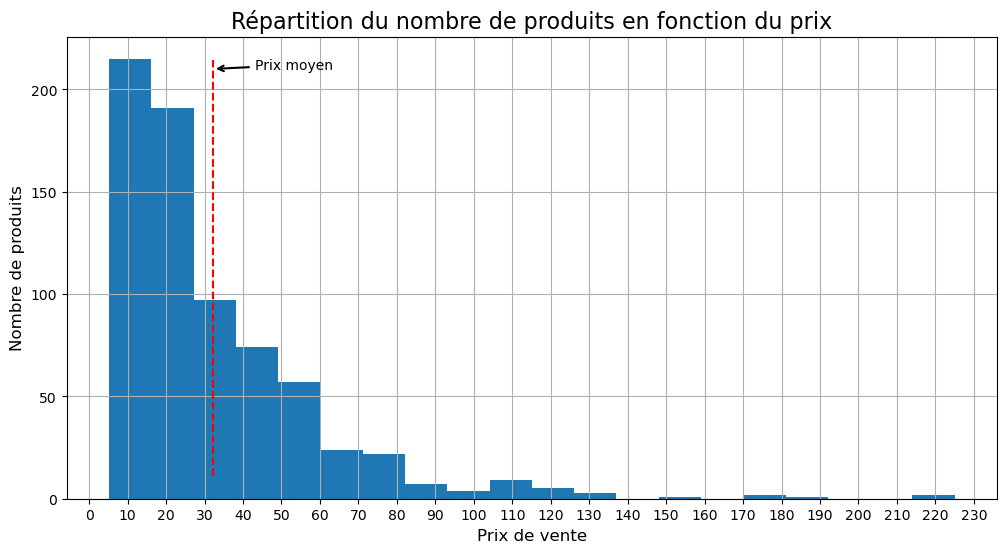

In [50]:
# visualisation
erp_web_ca['price'].plot.hist(density=False, bins=20, figsize=(12, 6))
plt.xticks([10 * i for i in range(24)])
plt.title("Répartition du nombre de produits en fonction du prix", fontsize=16)
plt.xlabel("Prix de vente", fontsize=12)
plt.ylabel("Nombre de produits", fontsize=12)
plt.axvline(x=32.22, ymin=0.05, ymax=0.95, color="red", linestyle="--")
#plt.text(x=36, y=210, s="Prix moyen", color="red")
plt.annotate("Prix moyen", xy=(32.22, 210), xytext=(43, 210), color='black', arrowprops={"arrowstyle": "->", "color": "black", "lw":1.5})
plt.grid()
plt.show()

## Détection des **outliers avec z-score**

### *Calcul sans librairie*

In [21]:
#erp_web_ca['zscore'] = (erp_web_ca['price'] - erp_web_ca['price'].mean()) / erp_web_ca['price'].std(ddof=0)

### *Calcul avec la librairie scipy.stats*

In [22]:
erp_web_ca.sort_values(by='price', inplace=True)
erp_web_ca["z-score"] = stats.zscore(erp_web_ca["price"])
outlier_z = erp_web_ca[erp_web_ca["z-score"] > 1.96]
nb_outlier_z = len(outlier_z)
print(bold + red + f"\nLes {nb_outlier_z} produits concernés par un z-score > 1,96 sont :" + end)
outlier_z


Les 30 produits concernés par un z-score > 1,96 sont :


,product_id,sku,post_name,price,total_sales,stock_quantity,CA par produit,z-score
65,4132,11668,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,88.4,0.0,5,0.0,2.011686
502,5565,19822,tempier-bandol-cabassaou-2017,92.0,0.0,0,0.0,2.141225
602,5916,14774,wemyss-malts-single-cask-chocolate-moka-cake,93.0,0.0,3,0.0,2.177207
655,6214,11601,domaine-des-comtes-lafon-volnay-1er-cru-champa...,99.0,0.0,7,0.0,2.393104
63,4115,15382,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,100.0,0.0,11,0.0,2.429087
380,4903,14805,domaine-des-croix-corton-grand-cru-les-greves-...,102.3,0.0,20,0.0,2.511848
222,4407,3509,cognac-frapin-cigar-blend,104.0,1.0,6,104.0,2.573018
432,5008,11602,domaine-des-comtes-lafon-volnay-1er-cru-santen...,105.0,0.0,10,0.0,2.609001
431,5007,12791,domaine-des-comtes-lafon-volnay-1er-cru-santen...,105.0,0.0,17,0.0,2.609001
647,6201,14596,david-duband-chambolle-musigny-1er-cru-les-sen...,105.6,0.0,7,0.0,2.630591


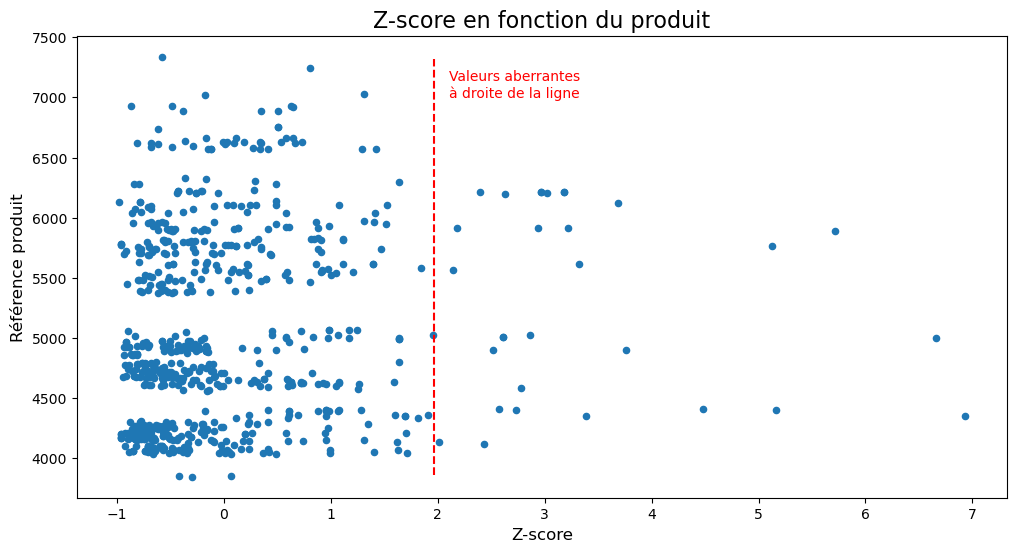

In [23]:
# visualisation
ax = erp_web_ca.plot.scatter(x='z-score', y='product_id', figsize=(12, 6))
plt.title("Z-score en fonction du produit", fontsize=16)
plt.xlabel("Z-score", fontsize=12)
plt.ylabel("Référence produit", fontsize=12)
ax.axvline(x=1.96, ymin=0.05, ymax=0.95, color="red", linestyle="--")
ax.text(x=2.1, y=7000, s="Valeurs aberrantes\nà droite de la ligne", color="red")
plt.show()

### *Part du CA*

In [24]:
outlier_z_ca = outlier_z["CA par produit"].sum()
print(bold + red + f"\nLe chiffre d'affaires total des outliers est de {outlier_z_ca} €" + end)
print(bold + red + f"\nCela représente {round((outlier_z_ca / total_ca) * 100, 2)} % du chiffre d'affaires total" + end)


Le chiffre d'affaires total des outliers est de 6884.4 €

Cela représente 9.76 % du chiffre d'affaires total


## Détection des valeurs **outliers avec l'écart interquartile**

In [25]:
q1 = np.quantile(erp_web_ca["price"], 0.25)
q3  = np.quantile(erp_web_ca["price"], 0.75)
iqr = q3 - q1
val_max = q3 + 1.5 * iqr
outlier_iqr = erp_web_ca[erp_web_ca["price"] > val_max]
nb_outlier_iqr = len(outlier_iqr)
print(bold + red + f"\nLa valeur maximale avec l'écart interquartile est de {round(val_max, 2)}" + end)
print(bold + red + f"\nLes {nb_outlier_iqr} produits qui ont une valeur supérieure à la valeur maximale sont :" + end)
outlier_iqr


La valeur maximale avec l'écart interquartile est de 84.29

Les 32 produits qui ont une valeur supérieure à la valeur maximale sont :


,product_id,sku,post_name,price,total_sales,stock_quantity,CA par produit,z-score
205,4359,13853,champagne-larmandier-bernier-grand-cru-vieille...,85.6,1.0,0,85.6,1.910934
438,5026,13913,champagne-agrapart-fils-mineral-extra-brut-bla...,86.8,0.0,2,0.0,1.954114
65,4132,11668,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,88.4,0.0,5,0.0,2.011686
502,5565,19822,tempier-bandol-cabassaou-2017,92.0,0.0,0,0.0,2.141225
602,5916,14774,wemyss-malts-single-cask-chocolate-moka-cake,93.0,0.0,3,0.0,2.177207
655,6214,11601,domaine-des-comtes-lafon-volnay-1er-cru-champa...,99.0,0.0,7,0.0,2.393104
63,4115,15382,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,100.0,0.0,11,0.0,2.429087
380,4903,14805,domaine-des-croix-corton-grand-cru-les-greves-...,102.3,0.0,20,0.0,2.511848
222,4407,3509,cognac-frapin-cigar-blend,104.0,1.0,6,104.0,2.573018
432,5008,11602,domaine-des-comtes-lafon-volnay-1er-cru-santen...,105.0,0.0,10,0.0,2.609001


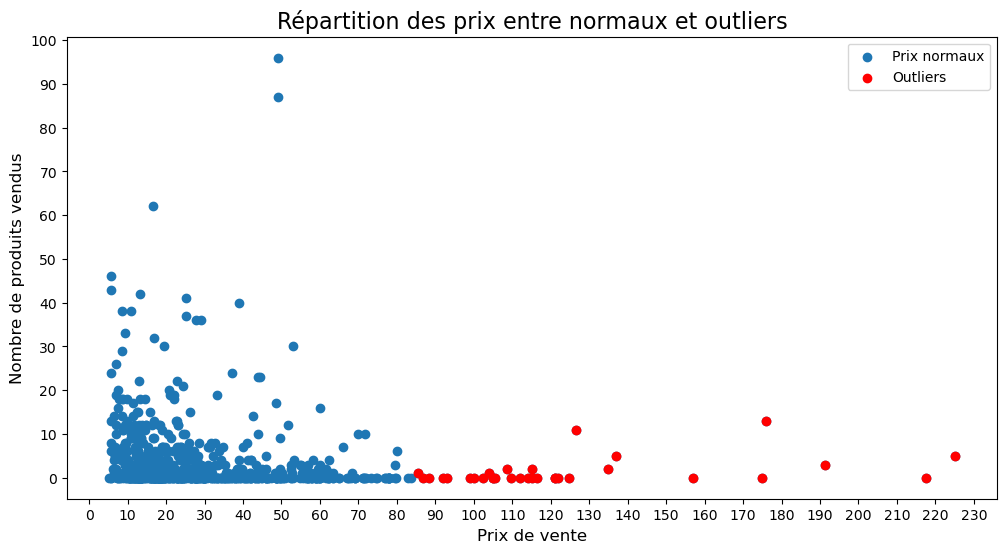

In [26]:
# visualisation
plt.figure(figsize=(12, 6))
plt.scatter(erp_web_ca['price'], erp_web_ca['total_sales'], label='Prix normaux')
plt.scatter(outlier_iqr['price'], outlier_iqr['total_sales'], color='red', label='Outliers')
plt.title("Répartition des prix entre normaux et outliers", fontsize=16)
plt.xticks([10 * i for i in range(24)])
plt.yticks([10 * i for i in range(11)])
plt.xlabel("Prix de vente", fontsize=12)
plt.ylabel("Nombre de produits vendus", fontsize=12)
plt.legend()
plt.show()

### *Part du CA*

In [27]:
outlier_iqr_ca = outlier_iqr["CA par produit"].sum()
print(bold + red +
      f"\nLe chiffre d'affaires total des outliers est de {outlier_iqr_ca} €" + end)
print(bold + red +
      f"\nCela représente {round((outlier_iqr_ca / total_ca) * 100, 2)} % du chiffre d'affaires total" + end)


Le chiffre d'affaires total des outliers est de 6970.0 €

Cela représente 9.88 % du chiffre d'affaires total


## **Représentation graphique des outliers (boxplot)**

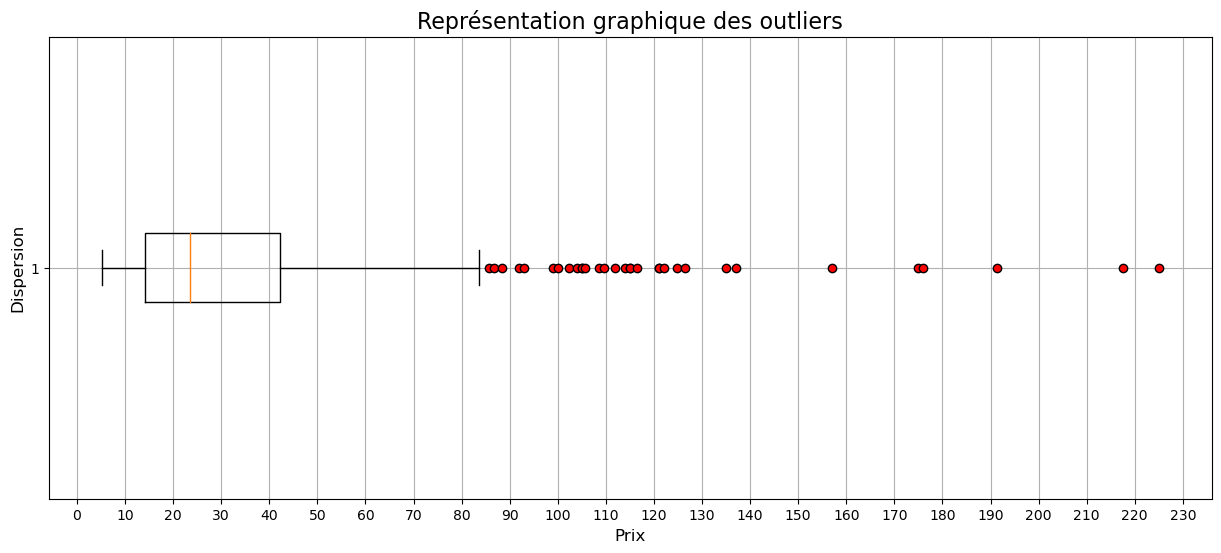

In [28]:
# visualisation
plt.figure(figsize=(15, 6))
flierprops = dict(marker='o', markerfacecolor='r', markersize=6, linestyle='none', markeredgecolor='black')
plt.boxplot(erp_web_ca["price"], flierprops=flierprops, vert=False)
plt.xticks([10 * i for i in range(24)])
plt.xlabel('Prix', fontsize=12)
plt.ylabel('Dispersion', fontsize=12)
plt.title("Représentation graphique des outliers", fontsize=16)
plt.grid()
plt.show()

## **Conclusion et recommandations**

<span style="color:red">
    
**Le chiffre d'affaires actuel est de 70 568.6 €**</span>

**Celui-ci pourrait être amélioré en affinant la sélection de produits :**

1. Nous avons remarqué que six d'entre eux constituent à eux seuls 22.38 % du chiffre d'affaires alors qu'ils ne représentent que 0.84 % des références et 9.67 % des ventes, ces produits sont à privilégier. Cela concerne un stock actuel de 30 bouteilles (0.15% des stocks).


2. Inversement 329 produits sur 714 (46.08 % des références) n'ont généré aucun chiffre d'affaires. Cela concerne un stock actuel de 5933 bouteilles (28.91% des stocks).


3. En terme de nombre de ventes sept produits se détachent, ils représentent à eux seuls 14.55 % du chiffre d'affaires et 17.15 % des ventes alors qu'ils constituent 0.98 % des produits référencés, ces produits sont également à privilégier. Cela concerne un stock actuel de 735 bouteilles (3.58 % des stocks).

**Nous pouvons également remarquer la présence de 30 outliers, dont le chiffre d'affaires représente 9.76% du chiffre d'affaires total, au vu de ce montant non négligable ils doivent être conservés pour l'analyse.**

**De plus, après vérification des références chez d'autres marchands, les montants s'avèrent bien cohérents.**
